# RNNの復習はここに

### nerの復習

###### データ読み込み
###### label encoding
###### 辞書作成　エンコード
###### データ分割
###### padding
###### 学習準備
###### モデルの定義
###### 学習ループ
###### 評価

In [4]:
import pickle

In [5]:
# ラベルデータ
with open('ner_dataset_labels.txt', 'rb') as fp:
    labels = pickle.load(fp)
# sentenceデータ
with open('ner_dataset_sentences.txt', 'rb') as fp:
    sentences = pickle.load(fp)

In [6]:
sentences

['The cat sat on the mat .',
 'John lives in New York .',
 'I have two dogs .',
 'She works at Google .',
 'The Eiffel Tower is in Paris .',
 'He is from Spain .',
 'I visited the Great Wall of China .',
 'She is studying at Oxford University .',
 'He works for the United Nations .',
 'Berlin is the capital of Germany .',
 'Mount Everest is the highest peak in the world .',
 'The Nile is the longest river in the world .',
 'The Pyramids are located in Egypt .',
 'The Sahara desert is in Africa .',
 'I work at Microsoft .',
 'She is from Australia .',
 'He is going to Paris for a meeting .',
 'The Amazon is the largest rainforest .',
 'He studied at Harvard .',
 'Mona Lisa is a famous painting .',
 'Shakespeare is known for Romeo and Juliet .',
 'Albert Einstein was a physicist .',
 'The Leaning Tower of Pisa is in Italy .',
 'The Great Barrier Reef is in Australia .',
 'She works at Facebook .',
 'The Grand Canyon is in Arizona .',
 'She is studying at the University of Tokyo .',
 'He 

In [7]:
labels

[['O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['B-per', 'O', 'O', 'B-geo', 'I-geo', 'O'],
 ['O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'B-org', 'O'],
 ['O', 'B-geo', 'I-geo', 'O', 'O', 'B-geo', 'O'],
 ['O', 'O', 'O', 'B-geo', 'O'],
 ['O', 'O', 'O', 'B-geo', 'I-geo', 'I-geo', 'I-geo', 'O'],
 ['O', 'O', 'O', 'O', 'B-org', 'I-org', 'O'],
 ['O', 'O', 'O', 'O', 'B-org', 'I-org', 'O'],
 ['B-geo', 'O', 'O', 'O', 'O', 'B-geo', 'O'],
 ['B-geo', 'I-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'B-geo', 'O', 'O', 'O', 'B-geo', 'O'],
 ['O', 'B-geo', 'O', 'O', 'O', 'B-geo', 'O'],
 ['O', 'O', 'O', 'B-org', 'O'],
 ['O', 'O', 'O', 'B-geo', 'O'],
 ['O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O'],
 ['O', 'B-geo', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'B-org', 'O'],
 ['B-per', 'I-per', 'O', 'O', 'O', 'O', 'O'],
 ['B-per', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['B-per', 'I-per', 'O', 'O', 'O', 'O'],
 ['O', 'B-geo', 'I-geo', 'I-geo', 'I-geo', '

### label encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [9]:
# まず、全てのラベルを取得するために全データで1つのリストにする
all_labels = [label for sublabel in labels for label in sublabel]

# これに対してlabel encoderのfit
label_encoder.fit(all_labels) # labelのidを作成する

# labelsに対して適用する。padding用に+1することに注意
encodered_labels = [label_encoder.transform(sublabel) + 1 for sublabel in labels]

In [10]:
encodered_labels

[array([7, 7, 7, 7, 7, 7, 7]),
 array([3, 7, 7, 1, 4, 7]),
 array([7, 7, 7, 7, 7]),
 array([7, 7, 7, 2, 7]),
 array([7, 1, 4, 7, 7, 1, 7]),
 array([7, 7, 7, 1, 7]),
 array([7, 7, 7, 1, 4, 4, 4, 7]),
 array([7, 7, 7, 7, 2, 5, 7]),
 array([7, 7, 7, 7, 2, 5, 7]),
 array([1, 7, 7, 7, 7, 1, 7]),
 array([1, 4, 7, 7, 7, 7, 7, 7, 7, 7]),
 array([7, 1, 7, 7, 7, 7, 7, 7, 7, 7]),
 array([7, 1, 7, 7, 7, 1, 7]),
 array([7, 1, 7, 7, 7, 1, 7]),
 array([7, 7, 7, 2, 7]),
 array([7, 7, 7, 1, 7]),
 array([7, 7, 7, 7, 1, 7, 7, 7, 7]),
 array([7, 1, 7, 7, 7, 7, 7]),
 array([7, 7, 7, 2, 7]),
 array([3, 6, 7, 7, 7, 7, 7]),
 array([3, 7, 7, 7, 7, 7, 7, 7]),
 array([3, 6, 7, 7, 7, 7]),
 array([7, 1, 4, 4, 4, 7, 7, 1, 7]),
 array([7, 1, 4, 4, 7, 7, 1, 7]),
 array([7, 7, 7, 2, 7]),
 array([7, 1, 4, 7, 7, 1, 7]),
 array([7, 7, 7, 7, 7, 2, 5, 5, 7]),
 array([7, 7, 7, 1, 4, 7]),
 array([7, 7, 7, 1, 7, 7, 7]),
 array([7, 7, 7, 7, 2, 5, 5, 7])]

### 辞書作成 エンコード

In [11]:
word2indx = {'<PAD>':0}
encodered_sentences = []
for sentence in sentences:
    encodered_sentence = [word2indx.setdefault(word, len(word2indx)) for word in sentence.split() ]
    encodered_sentences.append(encodered_sentence) # ここでようやく2次元に 

In [12]:
encodered_sentences

[[1, 2, 3, 4, 5, 6, 7],
 [8, 9, 10, 11, 12, 7],
 [13, 14, 15, 16, 7],
 [17, 18, 19, 20, 7],
 [1, 21, 22, 23, 10, 24, 7],
 [25, 23, 26, 27, 7],
 [13, 28, 5, 29, 30, 31, 32, 7],
 [17, 23, 33, 19, 34, 35, 7],
 [25, 18, 36, 5, 37, 38, 7],
 [39, 23, 5, 40, 31, 41, 7],
 [42, 43, 23, 5, 44, 45, 10, 5, 46, 7],
 [1, 47, 23, 5, 48, 49, 10, 5, 46, 7],
 [1, 50, 51, 52, 10, 53, 7],
 [1, 54, 55, 23, 10, 56, 7],
 [13, 57, 19, 58, 7],
 [17, 23, 26, 59, 7],
 [25, 23, 60, 61, 24, 36, 62, 63, 7],
 [1, 64, 23, 5, 65, 66, 7],
 [25, 67, 19, 68, 7],
 [69, 70, 23, 62, 71, 72, 7],
 [73, 23, 74, 36, 75, 76, 77, 7],
 [78, 79, 80, 62, 81, 7],
 [1, 82, 22, 31, 83, 23, 10, 84, 7],
 [1, 29, 85, 86, 23, 10, 59, 7],
 [17, 18, 19, 87, 7],
 [1, 88, 89, 23, 10, 90, 7],
 [17, 23, 33, 19, 5, 35, 31, 91, 7],
 [25, 9, 10, 92, 93, 7],
 [94, 51, 95, 96, 97, 98, 7],
 [25, 18, 36, 5, 99, 100, 101, 7]]

In [13]:
word2indx

{'<PAD>': 0,
 'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat': 6,
 '.': 7,
 'John': 8,
 'lives': 9,
 'in': 10,
 'New': 11,
 'York': 12,
 'I': 13,
 'have': 14,
 'two': 15,
 'dogs': 16,
 'She': 17,
 'works': 18,
 'at': 19,
 'Google': 20,
 'Eiffel': 21,
 'Tower': 22,
 'is': 23,
 'Paris': 24,
 'He': 25,
 'from': 26,
 'Spain': 27,
 'visited': 28,
 'Great': 29,
 'Wall': 30,
 'of': 31,
 'China': 32,
 'studying': 33,
 'Oxford': 34,
 'University': 35,
 'for': 36,
 'United': 37,
 'Nations': 38,
 'Berlin': 39,
 'capital': 40,
 'Germany': 41,
 'Mount': 42,
 'Everest': 43,
 'highest': 44,
 'peak': 45,
 'world': 46,
 'Nile': 47,
 'longest': 48,
 'river': 49,
 'Pyramids': 50,
 'are': 51,
 'located': 52,
 'Egypt': 53,
 'Sahara': 54,
 'desert': 55,
 'Africa': 56,
 'work': 57,
 'Microsoft': 58,
 'Australia': 59,
 'going': 60,
 'to': 61,
 'a': 62,
 'meeting': 63,
 'Amazon': 64,
 'largest': 65,
 'rainforest': 66,
 'studied': 67,
 'Harvard': 68,
 'Mona': 69,
 'Lisa': 70,
 'famous': 71,
 'painti

### 訓練データ、検証データに分割する

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_val, y_train, y_val, train_sentences, val_sentences = train_test_split(encodered_sentences, encodered_labels, sentences, test_size=0.3, random_state=42)

In [16]:
print(X_train[:1])
print(y_train[:1])
print(train_sentences[:1])

[[1, 2, 3, 4, 5, 6, 7]]
[array([7, 7, 7, 7, 7, 7, 7])]
['The cat sat on the mat .']


In [17]:
from torch.nn.utils.rnn import pad_sequence
import torch

### padding

In [18]:
X_train = pad_sequence([torch.tensor(x) for x in X_train], batch_first=True)
X_val = pad_sequence([torch.tensor(x) for x in X_val], batch_first=True)
y_train = pad_sequence([torch.tensor(y) for y in y_train], batch_first=True)
y_val = pad_sequence([torch.tensor(y) for y in y_val], batch_first=True)

### モデルの定義　

### この後に、双方向、Deepに対応させて再度実行する

In [19]:
import torch.nn as nn
from model import Model
import torch


import pickle # ピクル
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.optim as optim
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt

In [27]:
vocab_size = len(word2indx) # 102
num_classes = len(label_encoder.classes_) + 1 # クラス数 paddingも考慮して+1をする 8クラスになる
embedding_dim = 50
hidden_size = 70 # 一般的にはembedding_dimより減らす
output_size = num_classes
batch_size = 3
learning_rate = 0.03

# モデルの定義
model = Model(vocab_size, embedding_dim, hidden_size, output_size, rnn_type='LSTM', bidirection=True)

# Dataset DataLoader作成
train_dataset = TensorDataset(X_train, y_train) # datasetを作成してくれる。便利
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# 損失関数とoptimizer
opt = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss(ignore_index=0)



In [28]:
# 損失関数とoptimizer
opt = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss(ignore_index=0)

num_epochs = 30
eary_stopping = 5

# ログ
# est_val_loss = float('inf')
train_losses = []
val_losses = []
val_accuracies = []

# GPU設定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_val_loss = 0.0
    total_correct = 0
    
    # training
    for i, (sentences, labels) in tqdm(enumerate(train_loader), desc='now training', total=len(train_loader), leave=False):
        sentences = sentences.to(device)
        labels = labels.to(device)
        opt.zero_grad()
        output, _ = model(sentences) # [batch_size, seq_len, num_classes]
        output = output.view(-1, num_classes) # [batch_size, seq_len, num_classes] -> [batch_size * seq_len, num_classes]
        labels = labels.view(-1) # [batch_size, seq_len] -> [batch_size * seq_len]
        loss = criterion(output, labels)
        loss.backward()
        running_loss += loss.item()
        opt.step()
    train_losses.append(running_loss / len(train_loader))

    # validation
    # 評価用

    total_num = 0
    total_correct = 0

    for i, (sentences, labels) in tqdm(enumerate(val_loader), desc='valdation', total=len(val_loader), leave=False):
        model.eval()
        with torch.no_grad():
            
            sentences = sentences.to(device)
            labels = labels.to(device)
            output, _ = model(sentences) # [batch_size, seq_len, num_classes]
    
            # accuracy計算
            _, predicted = torch.max(output, -1) #[batch_size, seq_len]
            total_correct += torch.sum(predicted == labels).item()
            total_num += labels.numel() # [batch_size * seq_len]
    
            
            output = output.view(-1, num_classes) # [batch_size, seq_len, num_classes] -> [batch_size * seq_len, num_classes]
            labels = labels.view(-1) # [batch_size, seq_len] -> [batch_size * seq_len]
            loss = criterion(output, labels)
            running_val_loss += loss.item()
    
    val_losses.append(running_val_loss / len(val_loader))
    val_accuracies.append(total_correct / total_num)
    print(f"epoch={epoch}  train_losse={train_losses[-1]:.4f} val_loss={val_losses[-1]:.4f} val_accuracy={val_accuracies[-1]:.4f}")

epoch=0  train_losse=1.5068 val_loss=0.8057 val_accuracy=0.5972


epoch=1  train_losse=0.6621 val_loss=0.6443 val_accuracy=0.6111


epoch=2  train_losse=0.2966 val_loss=0.7158 val_accuracy=0.6111


epoch=3  train_losse=0.0772 val_loss=1.0105 val_accuracy=0.6250


epoch=4  train_losse=0.0519 val_loss=1.3215 val_accuracy=0.5972


epoch=5  train_losse=0.0292 val_loss=1.0693 val_accuracy=0.6250


epoch=6  train_losse=0.0019 val_loss=0.9614 val_accuracy=0.6111


epoch=7  train_losse=0.0013 val_loss=0.9302 val_accuracy=0.6111


epoch=8  train_losse=0.0009 val_loss=0.9261 val_accuracy=0.6111


epoch=9  train_losse=0.0007 val_loss=0.9317 val_accuracy=0.6111


epoch=10  train_losse=0.0005 val_loss=0.9400 val_accuracy=0.6111


epoch=11  train_losse=0.0005 val_loss=0.9495 val_accuracy=0.6111


epoch=12  train_losse=0.0004 val_loss=0.9598 val_accuracy=0.6111


epoch=13  train_losse=0.0003 val_loss=0.9682 val_accuracy=0.6111


epoch=14  train_losse=0.0003 val_loss=0.9748 val_accuracy=0.6111


epoch=15  train_losse=0.0003 val_loss=0.9812 val_accuracy=0.6111


epoch=16  train_losse=0.0003 val_loss=0.9865 val_accuracy=0.6111


epoch=17  train_losse=0.0002 val_loss=0.9918 val_accuracy=0.6111


epoch=18  train_losse=0.0002 val_loss=0.9965 val_accuracy=0.6250


epoch=19  train_losse=0.0002 val_loss=1.0010 val_accuracy=0.6250


epoch=20  train_losse=0.0002 val_loss=1.0050 val_accuracy=0.6250


epoch=21  train_losse=0.0002 val_loss=1.0086 val_accuracy=0.6250


epoch=22  train_losse=0.0002 val_loss=1.0125 val_accuracy=0.6250


epoch=23  train_losse=0.0002 val_loss=1.0160 val_accuracy=0.6250


epoch=24  train_losse=0.0002 val_loss=1.0190 val_accuracy=0.6250


epoch=25  train_losse=0.0002 val_loss=1.0224 val_accuracy=0.6250


epoch=26  train_losse=0.0002 val_loss=1.0256 val_accuracy=0.6250


epoch=27  train_losse=0.0001 val_loss=1.0292 val_accuracy=0.6250


epoch=28  train_losse=0.0001 val_loss=1.0323 val_accuracy=0.6250


epoch=29  train_losse=0.0001 val_loss=1.0352 val_accuracy=0.6250


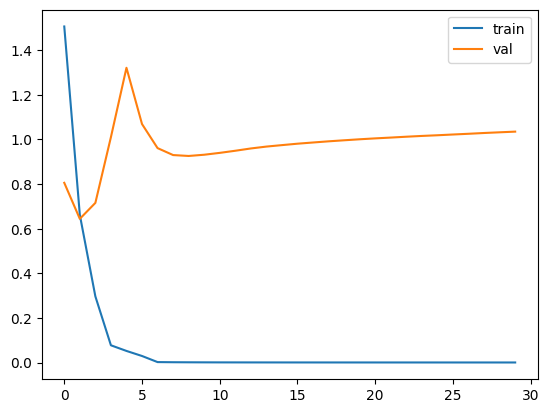

In [29]:
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.show()